# Introduction
Model of a two state reparable system:
$$
\begin{equation}
\frac{dp_0}{dt} = -\lambda_0 p_0(t) + \int_0^1 \mu_1(x)p_1(x,t)dx + \int_0^1u^{*}(x,t)dx
\end{equation}
$$

$$
\begin{equation}
\frac{\partial p_1(x,t)}{\partial t} + \frac{\partial p_1(x,t)}{\partial x} = -\mu_1(x)p_1(x,t) - u^{*}(x,t)
\end{equation}
$$

where:

$p_0(t)$: Probability that the device is in good mode 0 at time $t$.

$p_1(x,t)$: Probability density (with respect to repair time $x$) that the failed device is in failure mode 1 at time $t$ and has an elapsed repair time of $x$

$\mu_1(x)$: Time-dependent nonnegative repair rate when the device is in failure state and has an elapsed repair time of $x$.

Carefully provide a mathematical description of the problem discussed in this report. 
$$
\begin{equation}
\frac{dp_0}{dt} = -\lambda_0 p_0(t) + \int_0^1 \mu_1(x)p_1(x,t)dx + \int_0^1u^{*}(x,t)dx
\end{equation}
$$

$$
\begin{equation}
\frac{\partial p_1(x,t)}{\partial t} + \frac{\partial p_1(x,t)}{\partial x} = -\mu_1(x)p_1(x,t) - u^{*}(x,t)
\end{equation}
$$

#### Given Initial Conditions

$$
\begin{eqnarray}
p_1(x,0) &=& 0\\
p_0(0) &=& 1
\end{eqnarray}
$$

#### Given Boundary Conditions:

$$
\begin{eqnarray}
p_1(0,t) &=& \lambda_0 p_0(t)\\
p_1(1,t) &=& 0
\end{eqnarray}
$$

The function $u^*$ is given by
$$
\begin{eqnarray}
u^{*}(x,t) &=& (0.3+0.1 sin(x))b(t) 
\end{eqnarray}
$$

The function $b(t)$ represents the input. It is related to the cost constraint function
$c(t)$ as given below.

$$
\begin{eqnarray}
b(t)+\int_0^1\mu_1(x)f(x,t)dx -0.3p_0^{*}(t) = c(t)\\
f(x,t) = 0.1\cos(\pi t)\sin^2(1-x)
\end{eqnarray}
$$

Our objective is to find the input $b(t)$ such that the resulting distribution $p_0(t)$ is
closest (as measured by the 2-norm) to the optimal distribution $p_0^*(t)$ given below.
$$
\begin{equation}
p_0^{*}(t) = 0.85+0.05\cos(2\pi t)
\end{equation}
$$

### Methodology

We make couple of substitutions, following the notation that
$z_i^j$ refers to the value of $z$ evaluated at time point $i$ and at position $j$. The
repair time is divided into $m$ subintervals, while the system running time is divided
into $n$ subintervals. For the purposes of numerical implementation, we chose $m$ and $n$
to be $20$ and $400$ respectively.

$$
\begin{align}p_0(t_j) &= v_j \quad 0 \le j \le n\\
p_1(x_i,t_j) &= w_j^i \quad 0 \le i \le m, \, 0\le j \le n\\
\mu_1(x_i) &= \mu^i \quad 0 \le i \le m\\
\lambda &= \lambda_0 \\ 
\end{align}$$ 


Using the new notation, the boundary conditions and initial conditions may be written as
follows.


Initial conditions:
$$\begin{eqnarray}
w_0^{i} &=& 0 \quad \forall 0\le i \le m\\
v_0 &=& 1
\end{eqnarray}$$

Boundary Conditions:

$$\begin{eqnarray}
w_j^{20} &=& 0 \quad \forall 0\le j\le n\\
w_j^0 &=&  \lambda v_j
\end{eqnarray}$$

Also condensing,


$$\begin{eqnarray}
	I_j^{*}=u^{*}(x_i,t_j) &=& g^ib_j \\
\int_0^1 u^{*}(x,t_j)dx = \alpha b_j\\
where\ g^i = (0.3+0.1sin(x^i)) \nonumber
\end{eqnarray}$$

And,

$$\begin{eqnarray}
b(t)+\int_0^1\mu_1(x)f(x,t)dx -0.3p_0^{*}(t) = c(t) \nonumber \\
b_j = c_j - f_j \\
where\ f_j = \int_0^1\mu_1(x)f(x,t_j)dx -0.3p_0^{*}(t_j)
\end{eqnarray}$$



Discretizing

$$\begin{align}
\frac{v_{j+1}-v_j}{\tau} &= -\lambda v_j + I_j + I_j^{*} \\
I_j &= h[\frac{\mu^0 w_j^0}{2} + \sum_{k=1}^{19} \mu^k w_j^k + \frac{\mu^{20} w_j^{20}}{2} ] \\
    &=  h[\frac{\mu^0 w_j^0}{2} + \sum_{k=1}^{19} \mu^k w_j^k ] \nonumber \\
I_j^{*} &= \alpha b_j
\end{align}$$


Discretizing
$$
\begin{align}
\frac{w_{j+1}^i-w_{j}^i}{\tau} + \frac{w_j^{i+1}-w_j^{i-1}}{2h} = -\mu^iw_j^i - g^ib_j \nonumber\\
w_{j+1}^i=w_{j}^i-\frac{\tau}{2h}(w_j^{i+1}-w_j^{i-1})-\tau\mu^i w_j^i - \tau g^i b_j
\end{align}
$$

Applying LAX scheme $$w_j^i = \frac{w_j^{i-1} + w_j^{i+1}}{2}$$ we get,

$$
\begin{align*}
	w^i_{j+1} =& \left( \frac{w_j^{i+1} + w_j^{i-1}}{2} \right)
	-\frac{\tau}{2h}(w_j^{i+1}-w_j^{i-1}) \\
		&-\tau\mu^i\left( \frac{w_j^{i+1} + w_j^{i-1}}{2} \right)  \\
		&- \tau g^i b_j\\
	w^i_{j+1} =& \frac{1}{2}\left( 1-\mu^i\tau + \frac{\tau}{h} \right) w^{i-1}_j + \\
	           & \frac{1}{2}\left( 1-\mu^i\tau - \frac{\tau}{h} \right) w^{i+1}_j - \\
		   & \tau g^i b_j
\end{align*}
$$

Under an appropriately defined matrix $A$, we can re-write the above equation to read

$$
\begin{align}
	\vec{w}_{j+1} =& A\vec{w}_j - b_j\tau\vec{g} + \vec{e_1}v_{j+1} \\
	=& (A)^{j+1} \vec{w}_0 - \left[ \sum_{k=0}^j b_k (A)^{j-k} \right]\vec{g}\tau \\
	&+ \left[ \sum_{k=0}^j v_{k+1}(A)^{j-k} \right]\vec{e_1} \nonumber
\end{align}
$$
where $\vec{e_1}$ is an $m\times1$ matrix given by

$$
\begin{align}
	\vec{e_1} = \left[ \lambda,0,\dots,0 \right]^T
\end{align}
$$


Matrix A has the form:

$$
\begin{align}
 %\[ 
 \begin{pmatrix} w^0_{j+1} \\ w^1_{j+1} \\ \cdots \\ w^{n-2}_{j+1} \\ w^{n-1}_{j+1} \\ w^{n}_{j+1}  \end{pmatrix} &= \left( \begin{matrix}
0 & 0 & 0 & \cdots & 0 & 0 \\
%1 & 
a_{1} & 0 & a_{3} & \cdots & 0 & 0\\
0 & a_{2} & 0 & a_{4} & \cdots & 0\\
0 & 0 & a_{3} & 0 & a_5 & 0\\
\vdots \\
0 & 0 & \cdots &  0 & 0 & 0  \end{matrix} \right) \begin{pmatrix} w^0_j \\ w^1_j \\ \cdots \\ w^{n-2}_j \\ w^{n-1}_j \\ w^{n}_j\end{pmatrix}  \\
&+ b\tau \begin{pmatrix} g^0 \\ g^1 \\ \vdots \\ g^{n-2} \\ g^{n-1} \\ g^{n} \end{pmatrix} + v_{j+1} \begin{pmatrix}
\lambda \\ 0  \\ 0  \\ \vdots \\ 0 \\ 0 \\ 0
\end{pmatrix}
\end{align}
$$

From 
$$
\begin{align}
v_{j+1} &= (1-\lambda \tau)v_j + \tau I_j + \tau I_j^{*} \\
&= (1-\lambda \tau + \frac{h\tau}{2})v_j + h\tau\vec{\mu}^T\vec{w}_j + \alpha b_j\tau
%v_{j+1} = av_j + \tau I_j + \tau I_j^{*}\\
%v_{j} = av_{j-1} + \tau I_{j-1} + \tau I_{j-1}^{*}\\
%v_{j+1} = a^2v_{j-1} + \tau I_j + a\tau I_{j-1} + \tau I_{j}^{*} + a\tau I_{j-1}^{*} 
\end{align}$$
Substitute the expression for the time evolution for $\vec{w}$ in the above to obtain,
$$\begin{align*}
v_{j+1} =& (1-\lambda \tau+ \frac{h\tau}{2})v_j \\
         & + h\tau\vec{\mu}^T(A)^{j}\vec{w}_0 \\
	 & - \vec{\mu}^T\left[ \sum_{k=0}^{j-1} b_{k}(A)^{j-1-k} \right]\vec{g}\tau\\
	 & + \alpha b_j\tau
\end{align*}$$
Let's define 
$$\begin{align}
	\beta_{j,k}  &= \vec{\mu}^T (A)^{j-1-k}\vec{g} \\
        \omega_j &=\vec{\mu}^T(A)^{j}\vec{w}_0 \\
        \gamma   &=(1-\lambda \tau+ \frac{h\tau}{2})
\end{align}
$$

$$
\begin{align}
\vec{\beta_0} = \begin{pmatrix} \alpha \\ 0 \\ 0 \\ \vdots \\ 0 \end{pmatrix} \\
\end{align}
$$


$$
\begin{align} 
v_{j+1} &= \gamma v_j + h\tau\omega_j - \tau\sum_{k=0}^{j-1}\beta_{j,k}b_k
	   + \alpha b_j\tau \\
	   &= \gamma v_j + h\tau\omega_j - \tau \vec{\beta}_j^T \vec{b}\\
	   &= \gamma^{j+1}v_0 
	   + h\tau\sum_{k=0}^{j} \gamma^{j-k}\omega_k
	   - \left(\sum_{k=0}^{j} \gamma^{j-k} \vec{\beta}_k\right)^T \vec{b}
\end{align}
$$
Under appropriately defined strictly lower triangular matrices $G$ and $B$,
$$
\begin{align}
	\vec{v} = - B\vec{b}+\vec{d} + h\tau G\vec{\omega}  \\
	\vec{d}=\begin{pmatrix} 1 \\ \gamma \\  \gamma^2 \\ \gamma^3 \\ \vdots \\ \gamma^{n} \end{pmatrix}v_0
\end{align}
$$
where row $j+1$ of matrix $B$ is given by
$$\begin{equation}
\left(\sum_{k=0}^{j} \gamma^{j-k} \vec{\beta}_k\right)^T
\end{equation}$$

From the initial conditions, we have $\vec{w_0} = \vec{0}$ Thus $\vec{\omega} =
\vec{0}$. Consequently, we have,
$$
\begin{align}
	\vec{v} &= -B\vec{b} + \vec{d}
\end{align}
$$
Note that $\vec{d}$ is a known quantity.
Hence our optimization problem reduces to finding $\vec{b}$ that best fits the equation
$$
\begin{align}
	B\vec{b} = \vec{d}-\vec{v}^*
\end{align}
$$
The matrix $B$ is invertible in this case and hence our estimate of $\vec{v}$ is given by 
$$
\begin{align}
	\hat{\vec{b}} &= B^{-1} \left( \vec{d} - \vec{v}^* \right)\\
	\vec{v} &= -B\hat{\vec{b}} + \vec{d} \\
	        &= \vec{v}^*
\end{align}
$$



We approximate the integral using:
$$
\begin{equation}
\int_{-1}^{1}f(x,t)dx = \sum_{i=1}^{n} \rho_if(x_i,t)
\end{equation}
$$
We used Gauss-Legendre quadrature with $n=4$.
Thus,
$$
\begin{align}
	\int_{0}^{1}f(x,t)dx &= \frac{1}{2}\sum_{i=1}^{n} \rho_if\left(\frac{x_i}{2} +
	\frac{1}{2},t\right)\\
	\therefore c_j &= b_j + f_j
\end{align}
$$

## Observation and Conclusions

The inversion of matrix $B$ does present some difficulties. It is easily seen from the
definition of $B$ that it is lower triangular. In addition,
$$
\begin{equation}
	(B)_{ii} = \alpha\tau \quad \forall 0\le i \le n
\end{equation}
$$
As $B$ is lower triangular, its determinant is the product of the main diagonal terms.
$$
\begin{equation}
	|B| = (\alpha\tau)^{n+1}
\end{equation}
$$
We have $\alpha \approx 0.354$, $\tau = 0.025$ and $n=401$. Thus,
$$
\begin{equation}
	|B| \approx 10^{-802}
\end{equation}
$$
which makes $B$ dangerously close to being singular. In fact, taking a direct inverse in Julia results in
multiple entries going to $$\texttt{NaN}$$. We resolve this issue by computing the
Moore-Penrose pseudoinverse $B^+$ of $B$. For an invertible matrix $B$, $B^- = B^+$



In [2]:
m = 21          # The number of 'space' nodes
n = 401         # The number of 'time' nodes
τ = 10/(n-1)    # Time step size
h = 1/(m-1)     # Space step size

λ = 0.3
α = 0.3+0.1*(1-cos(1))         # Integral of g(x) = 0.3 +0.1sin(x) = 0.3+0.1(1-cos1)
x = vec(linspace(0,1,m))
t = vec(linspace(0,10,n))

α = 0.3+0.1*(1-cos(1))         # Integral of g(x) = 0.3 +0.1sin(x) = 0.3+0.1(1-cos1)
μ = 1./(1-x).^2; μ[1] = 0; μ[m] = 0;
β = zeros(m,m)
γ = (1-λ*τ+h*τ/2)

optv = 0.85 + 0.05cos(2π*t)   # The optimal distribution we are aiming at


## Calcuate A
A = zeros(m,m)

for i=2:m-1
    A[i,i-1] = 1 - τ*μ[i] + τ/h
    A[i,i+1] = 1 - τ*μ[i] - τ/h
end



## Calculate g
g = (0.3+0.1*sin(x))

## Quadrature
function mu(x)
    return 1/(1-x)^2
end

function f(x)
    ## Use just the x part
    ## Remaining cos(πt) should be multiplied later
    return 0.1*sin(1-x)*sin(1-x)
end

function fmu(x)
    return f(x)mu(x)
end

weights = [(18+√30)/36,(18-√30)/36]
point1 = √(3-2(√6)/(√5))/√7
point2 = √(3+2(√6)/(√5))/√7

## Integrate wrt x
fx = weights[1]*fmu((point1+1)/2)+weights[1]*fmu((-point1+1)/2)+weights[2]*fmu((point2+1)/2)+weights[2]*fmu((-point2+1)/2)
fx = fx/2
## Multiply by time vector
fxt = fx*cos(π*t)

## Calculate β
β = zeros(n,n)
β[1,1] = α
for j=2:n
    for k = 1:j-1
       a = (A^(j-1-k))'*μ
       β[j,k] = dot(μ,g)[1]
    end
       β[j,j] = α
end

B = zeros(n,n)
B[1,1] = α
for j=2:n
    for k=1:j
        B[j,:] += γ^(j-k)*β[k,:]
    end
end
B = τ*B
d = zeros(n,1)
for i=1:n
  d[i] = γ^(i-1)*0.9
end

estb = pinv(B)*vec(d-optv)
estv = -B*estb + d
errv = norm(estv-optv,2);
c = estb + fxt - 0.3optv


w = zeros(m,n)
w[1,:] = λ*estv
w[1,1] = 0
for i=2:n
    w[:,i] = A*w[:,i]-τ*estb[i]*g
end
M = ones(m)
p1hat = M'*w*h

using Gadfly


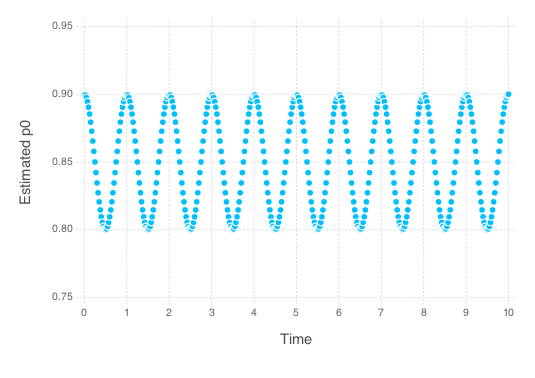

In [7]:
plot(x=t, y=estv, Guide.XLabel("Time"), Guide.YLabel("Estimated p0"),Guide.XTicks(ticks=[0:1:10]))


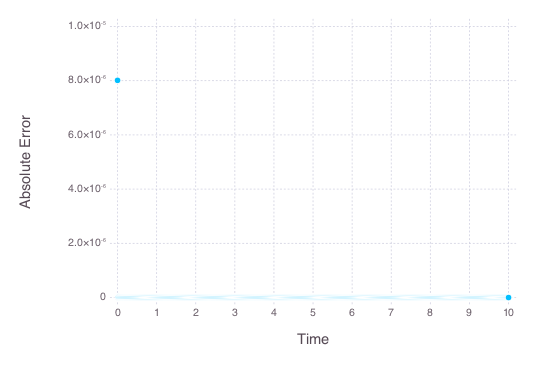

In [4]:
plot(x=t, y=abs(estv-optv), Guide.XLabel("Time"), Guide.YLabel("Absolute Error"),Guide.XTicks(ticks=[0:1:10]))


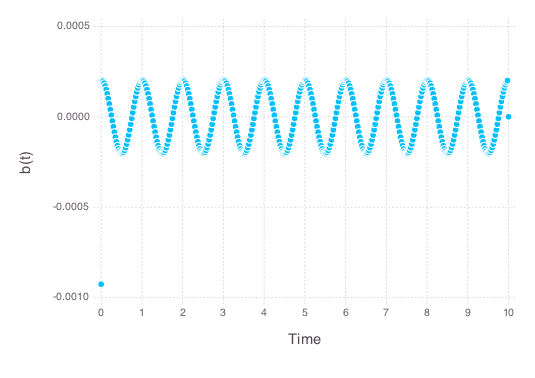

In [5]:
plot(x=t,y=estb, Guide.XLabel("Time"), Guide.YLabel("b(t)"),Guide.XTicks(ticks=[0:1:10]))


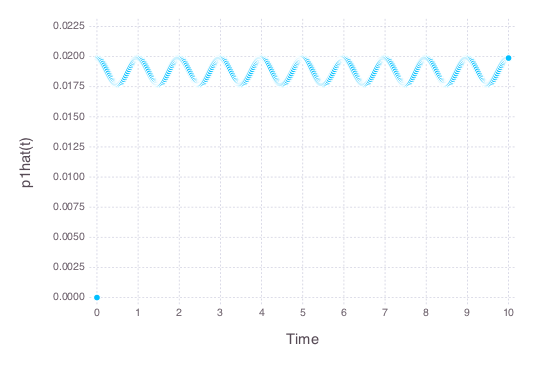

In [6]:
plot(x=t,y=p1hat, Guide.XLabel("Time"), Guide.YLabel("p1hat(t)"), Guide.YTicks(ticks=[0:0.0025:0.0225]), Guide.XTicks(ticks=[0:1:10]))